In [9]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')









font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)


In [10]:
df = pd.read_csv('review_jp_nlp.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'year',
       'review_translated', 'reviwe_translated_original', 'sentiment',
       'emotion', 'em_x_senti'],
      dtype='object')

In [13]:
df.head(2)

,reviewer_info,title,rating,review,year,review_translated,reviwe_translated_original,sentiment,emotion,em_x_senti
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...,neg,joy,"('joy', 'neg')"
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報,"[ ' Working ' , ' HoursHoliday ' , ' Leave ' ,...",Working Hours/Holiday Leave: It's up to you wh...,pos,joy,"('joy', 'pos')"


In [17]:
senti_neg = df[df['sentiment'] == 'neg']
senti_pos = df[df['sentiment'] == 'pos']

senti_neg.head(2)

,reviewer_info,title,rating,review,year,review_translated,reviwe_translated_original,sentiment,emotion,em_x_senti
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...,neg,joy,"('joy', 'neg')"
2,男性/ Solution Engineer/ 現職（回答時）/ 中途入社/ 在籍3～5年/ ...,Annual salary/salary,5.0,給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...,2020年時点の情報,"[ ' Salary ' , ' system ' , ' 80 ' , ' ' , ' '...",Salary system: 80% of the assumed annual incom...,neg,joy,"('joy', 'neg')"


### Positive

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-08-10 19:44:32.693 WARNING matplotlib.font_manager: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Figure(2160x2160)


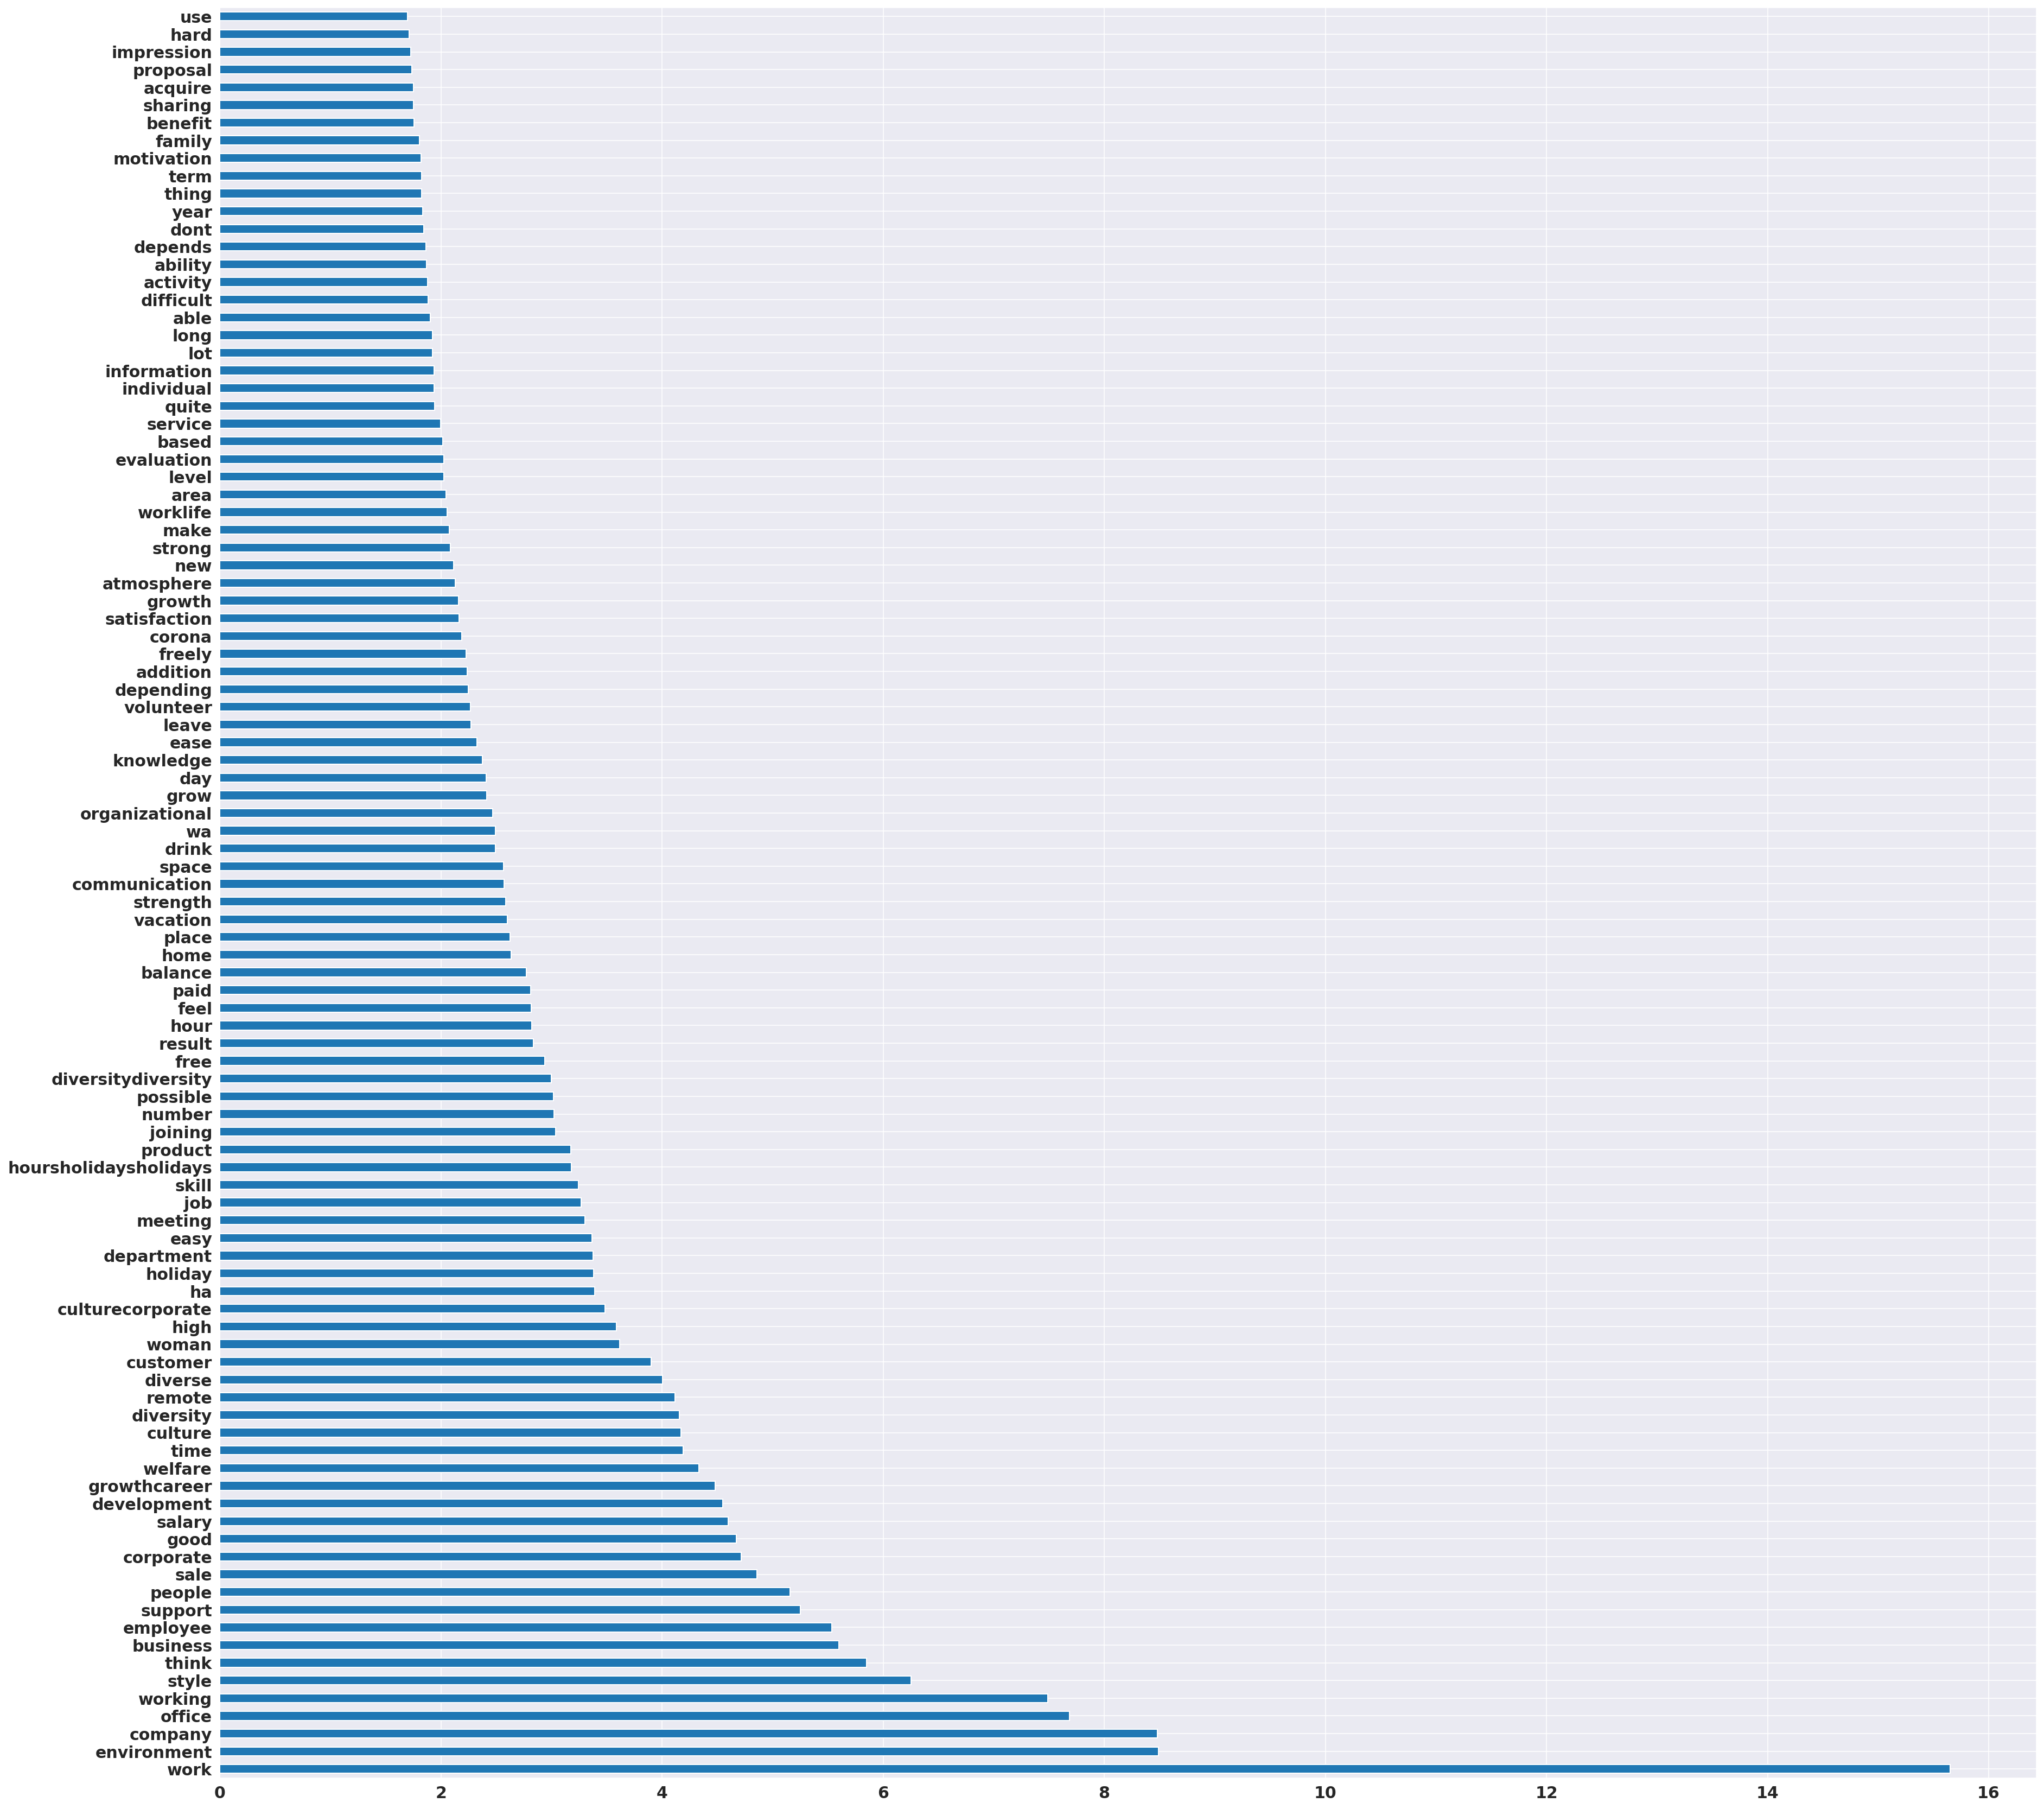

In [18]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(senti_pos['review_translated'])

pro_tf = tf.transform(senti_pos['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


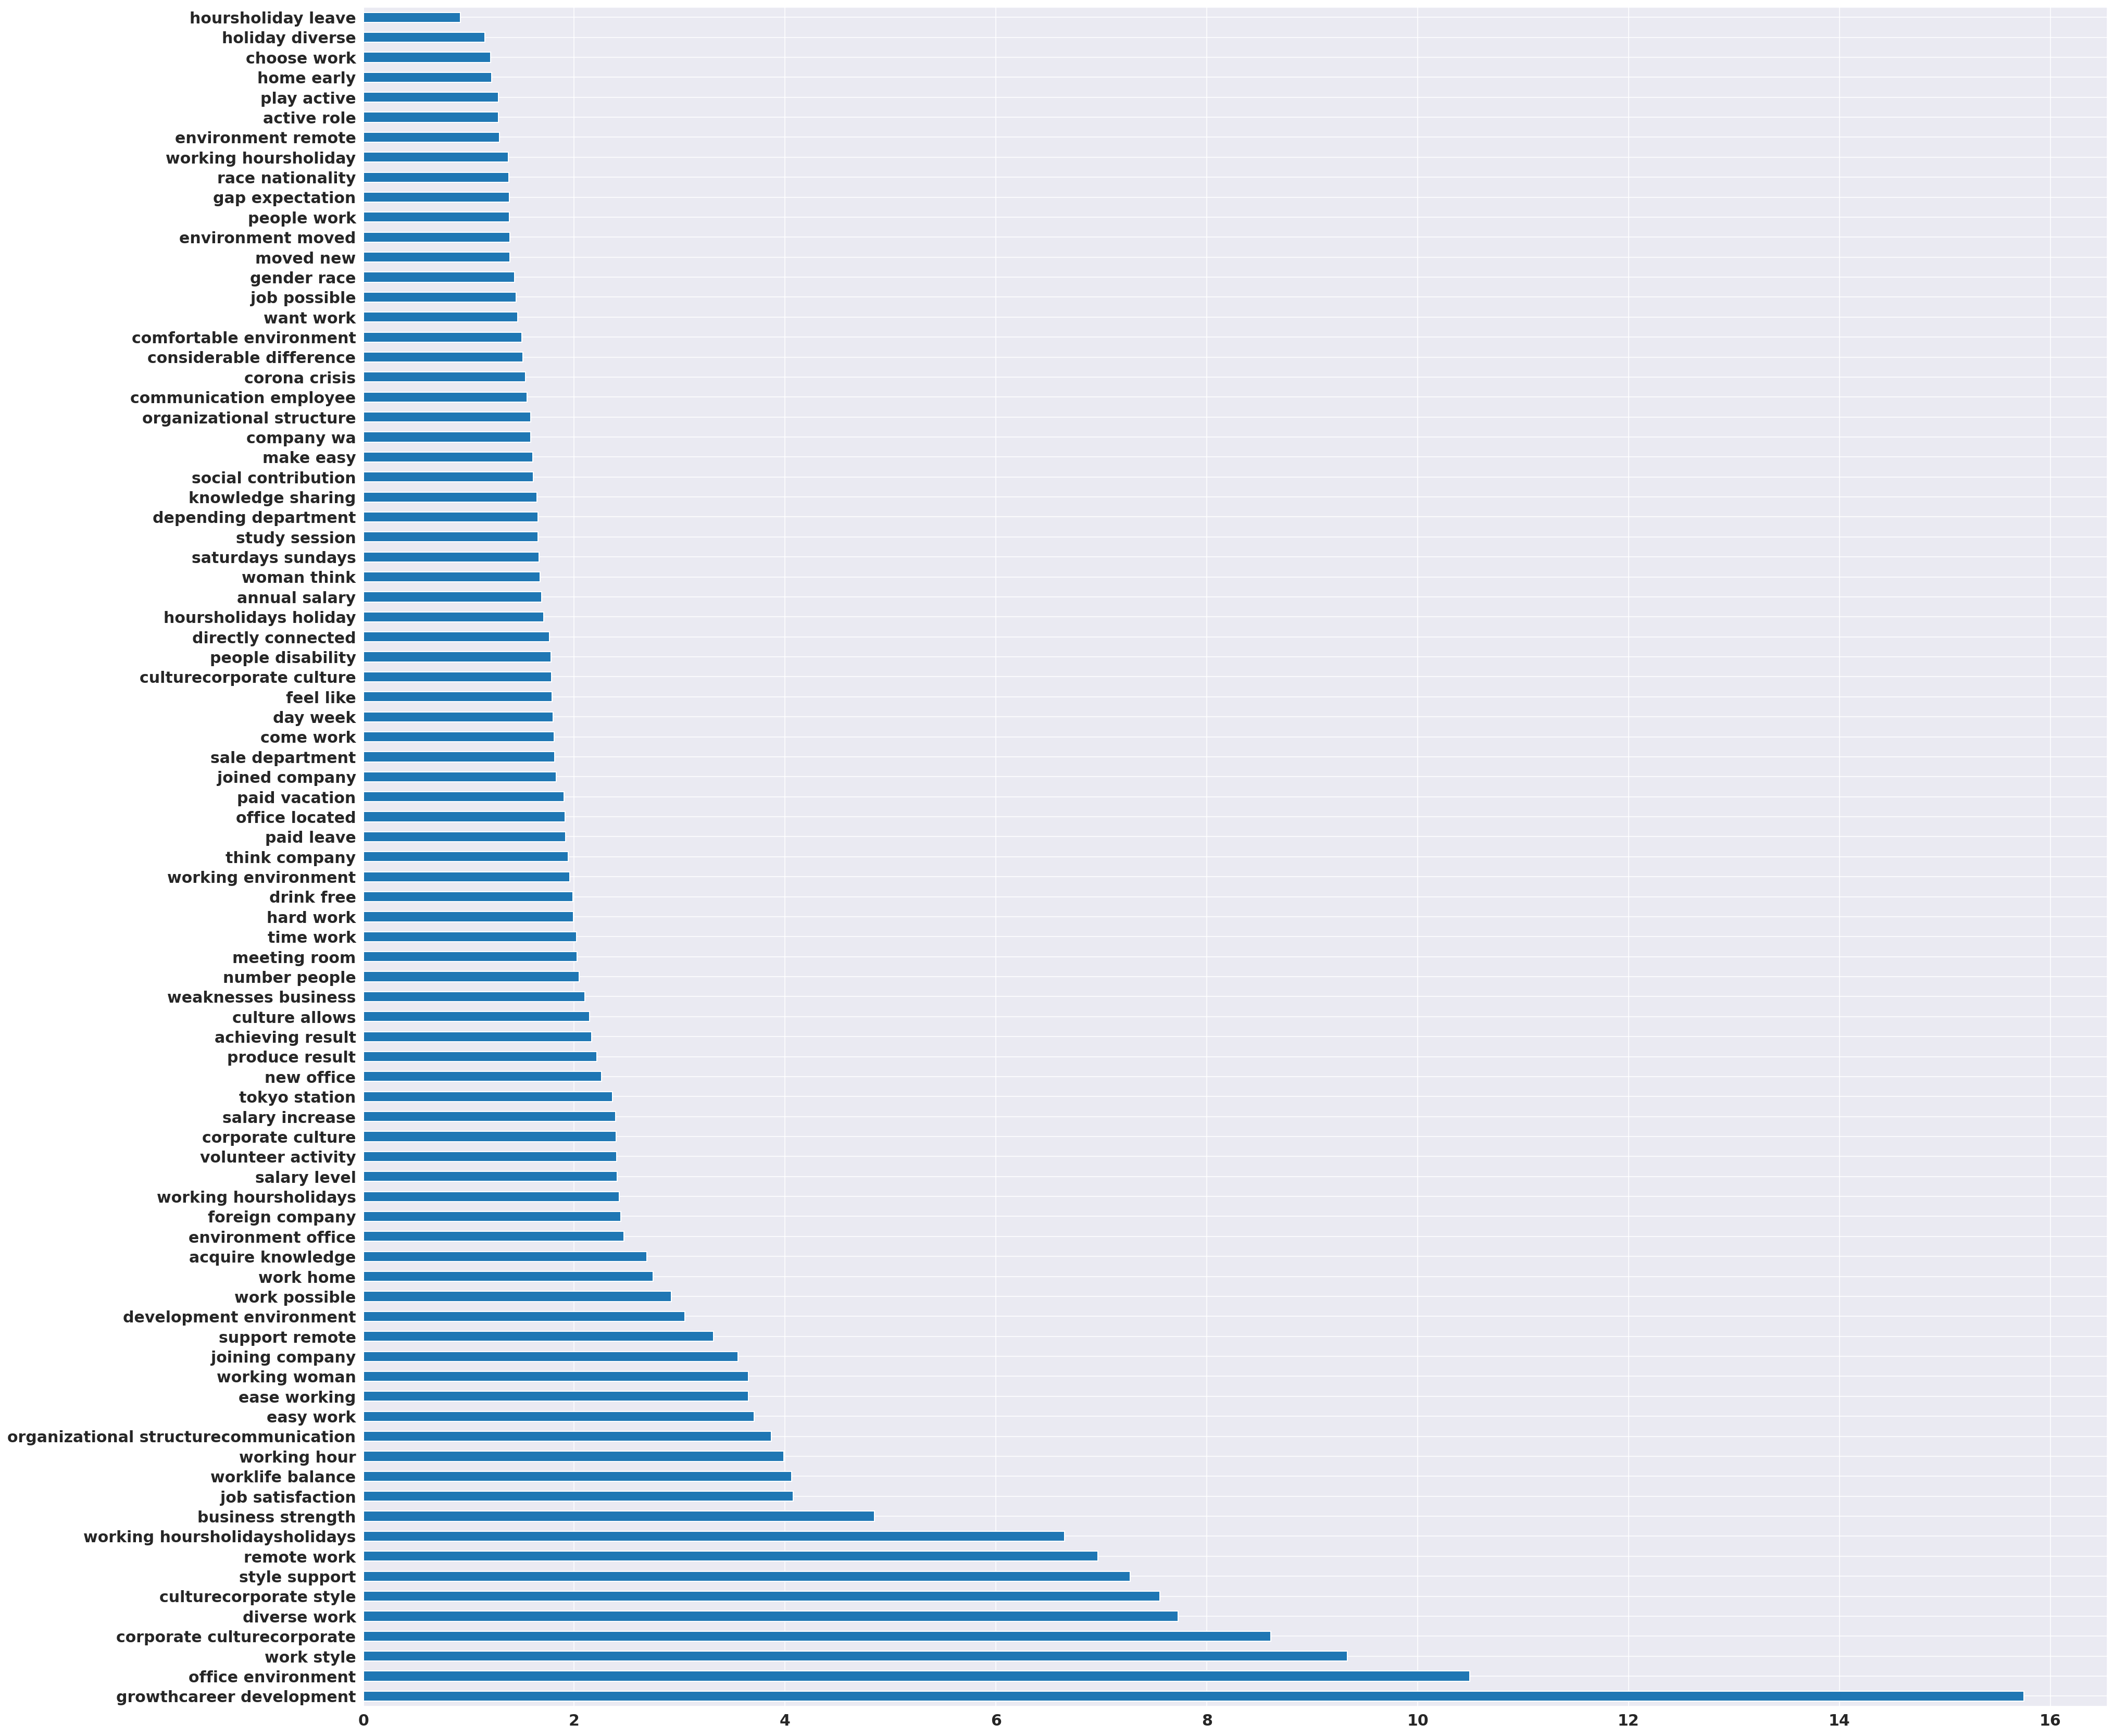

In [19]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(senti_pos['review_translated'])

pro_tf = tf.transform(senti_pos['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


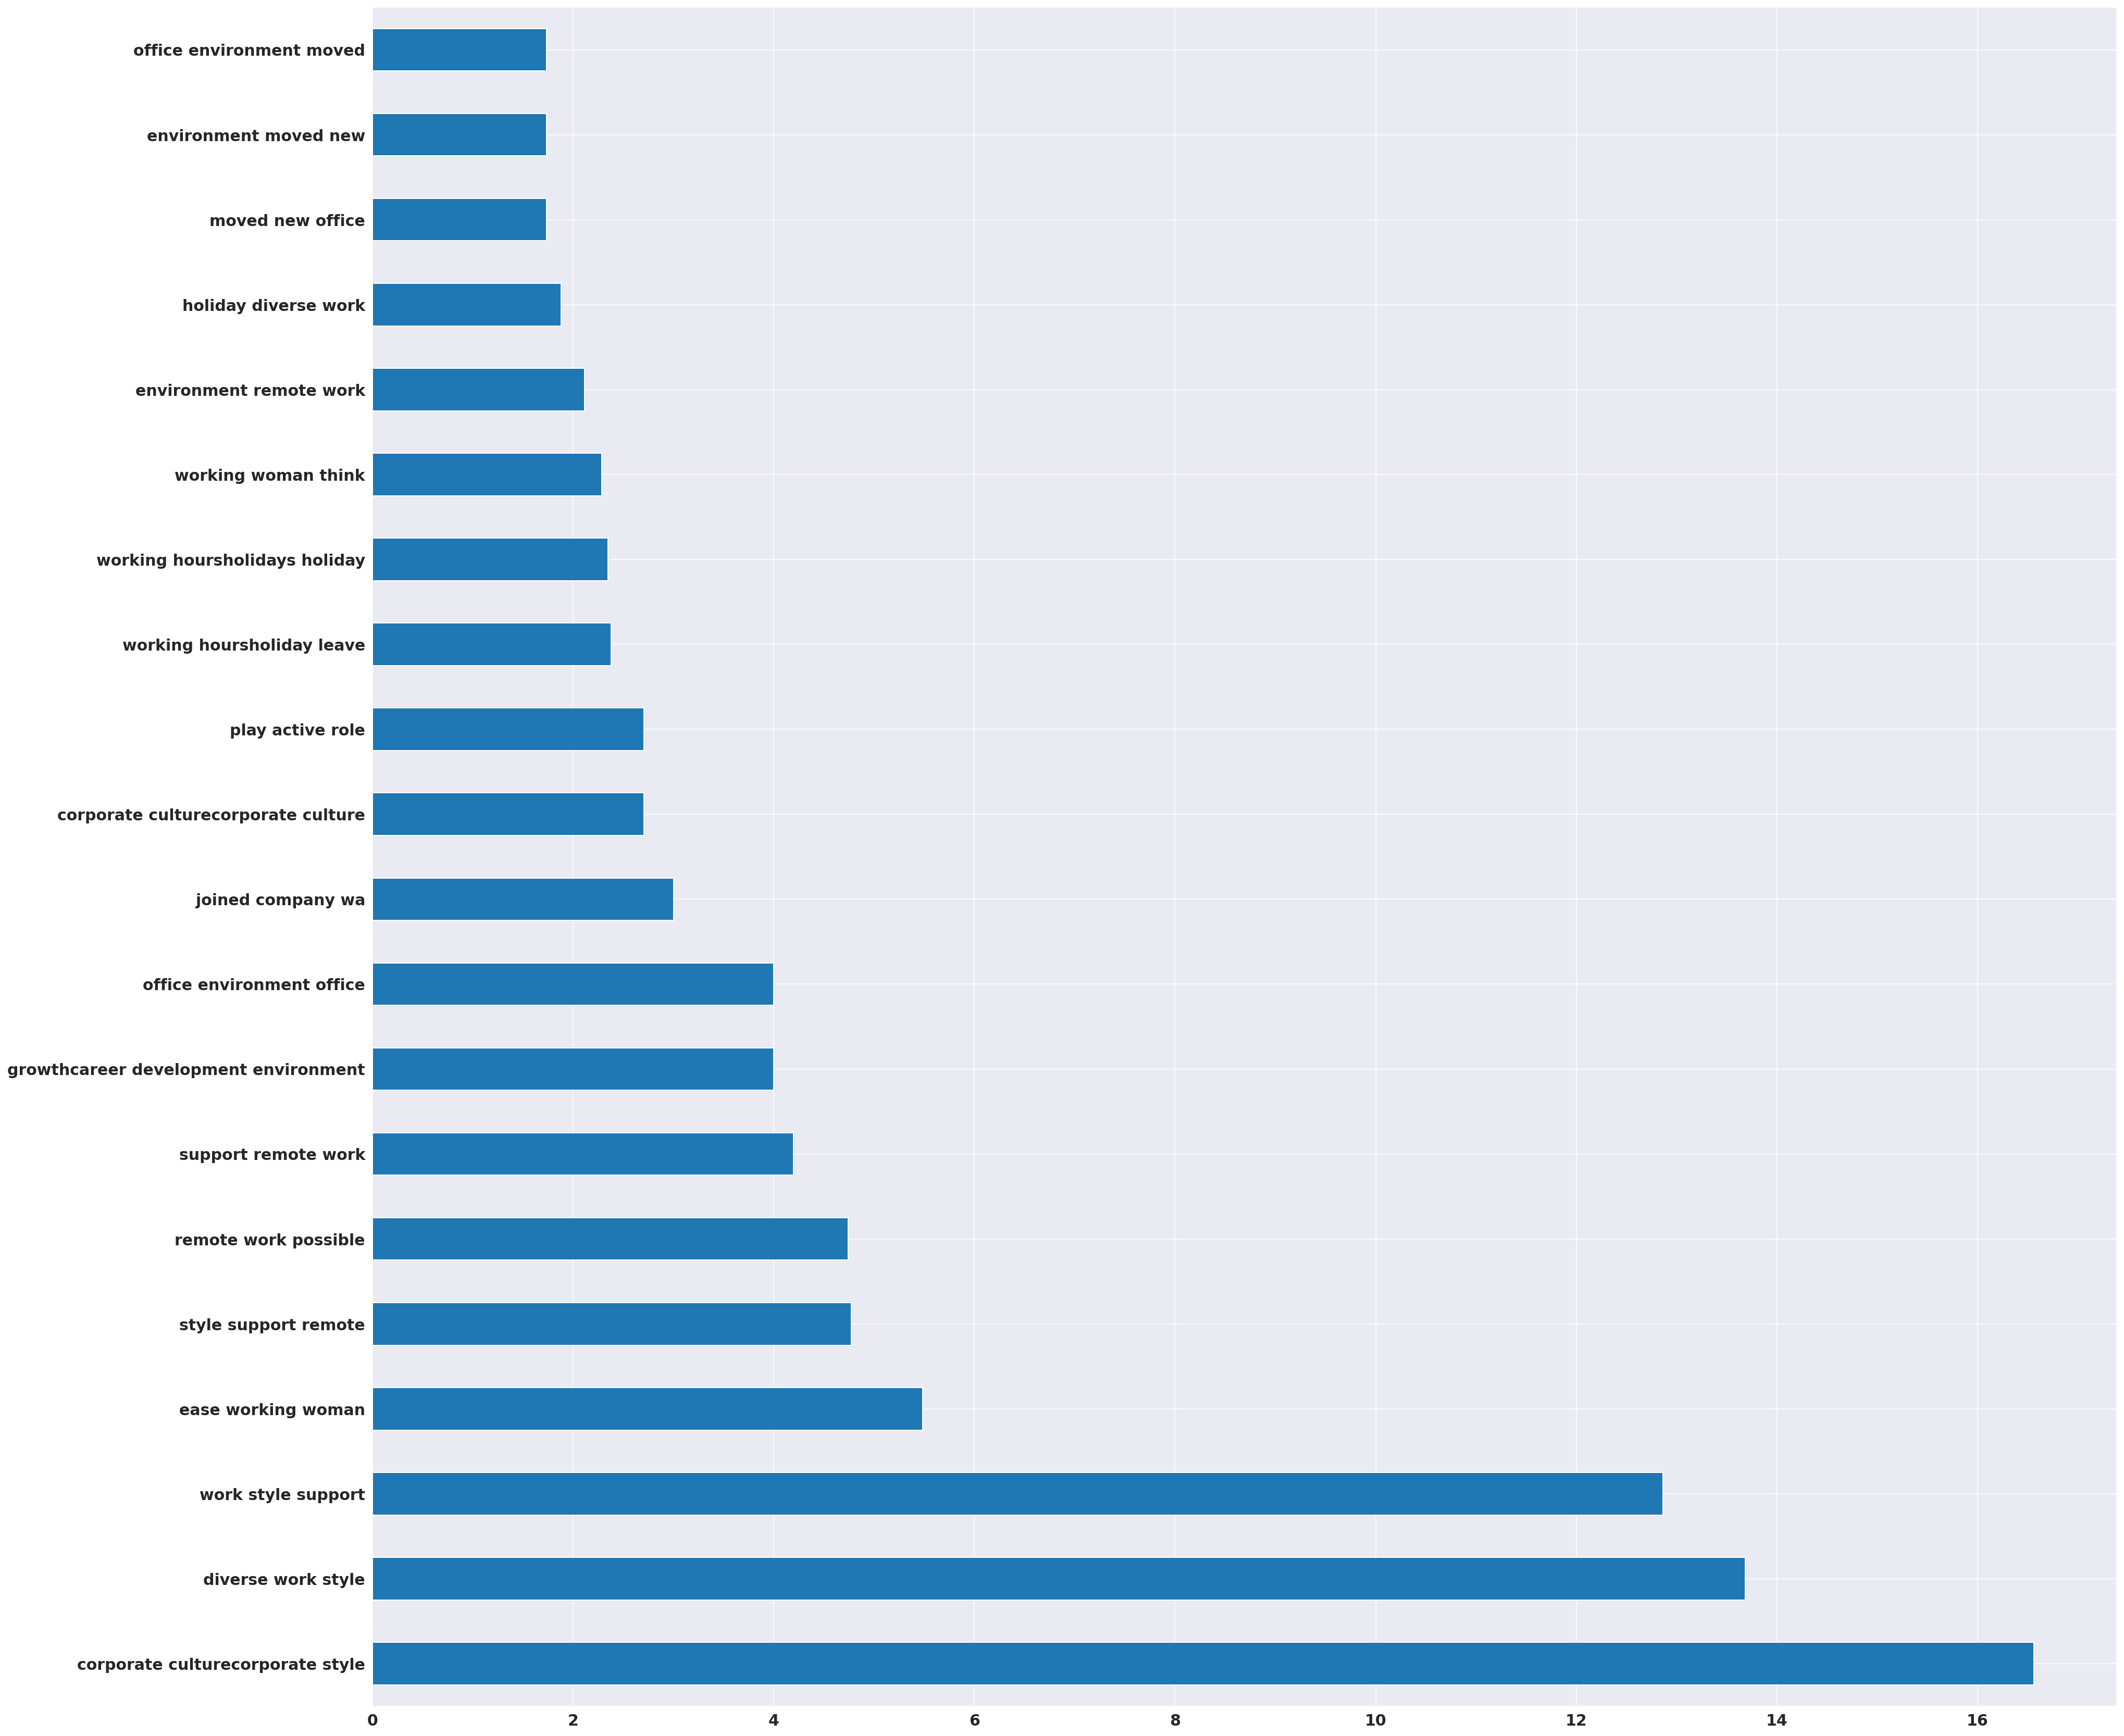

In [20]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (3,3))
tf.fit(senti_pos['review_translated'])

pro_tf = tf.transform(senti_pos['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

### Negative

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


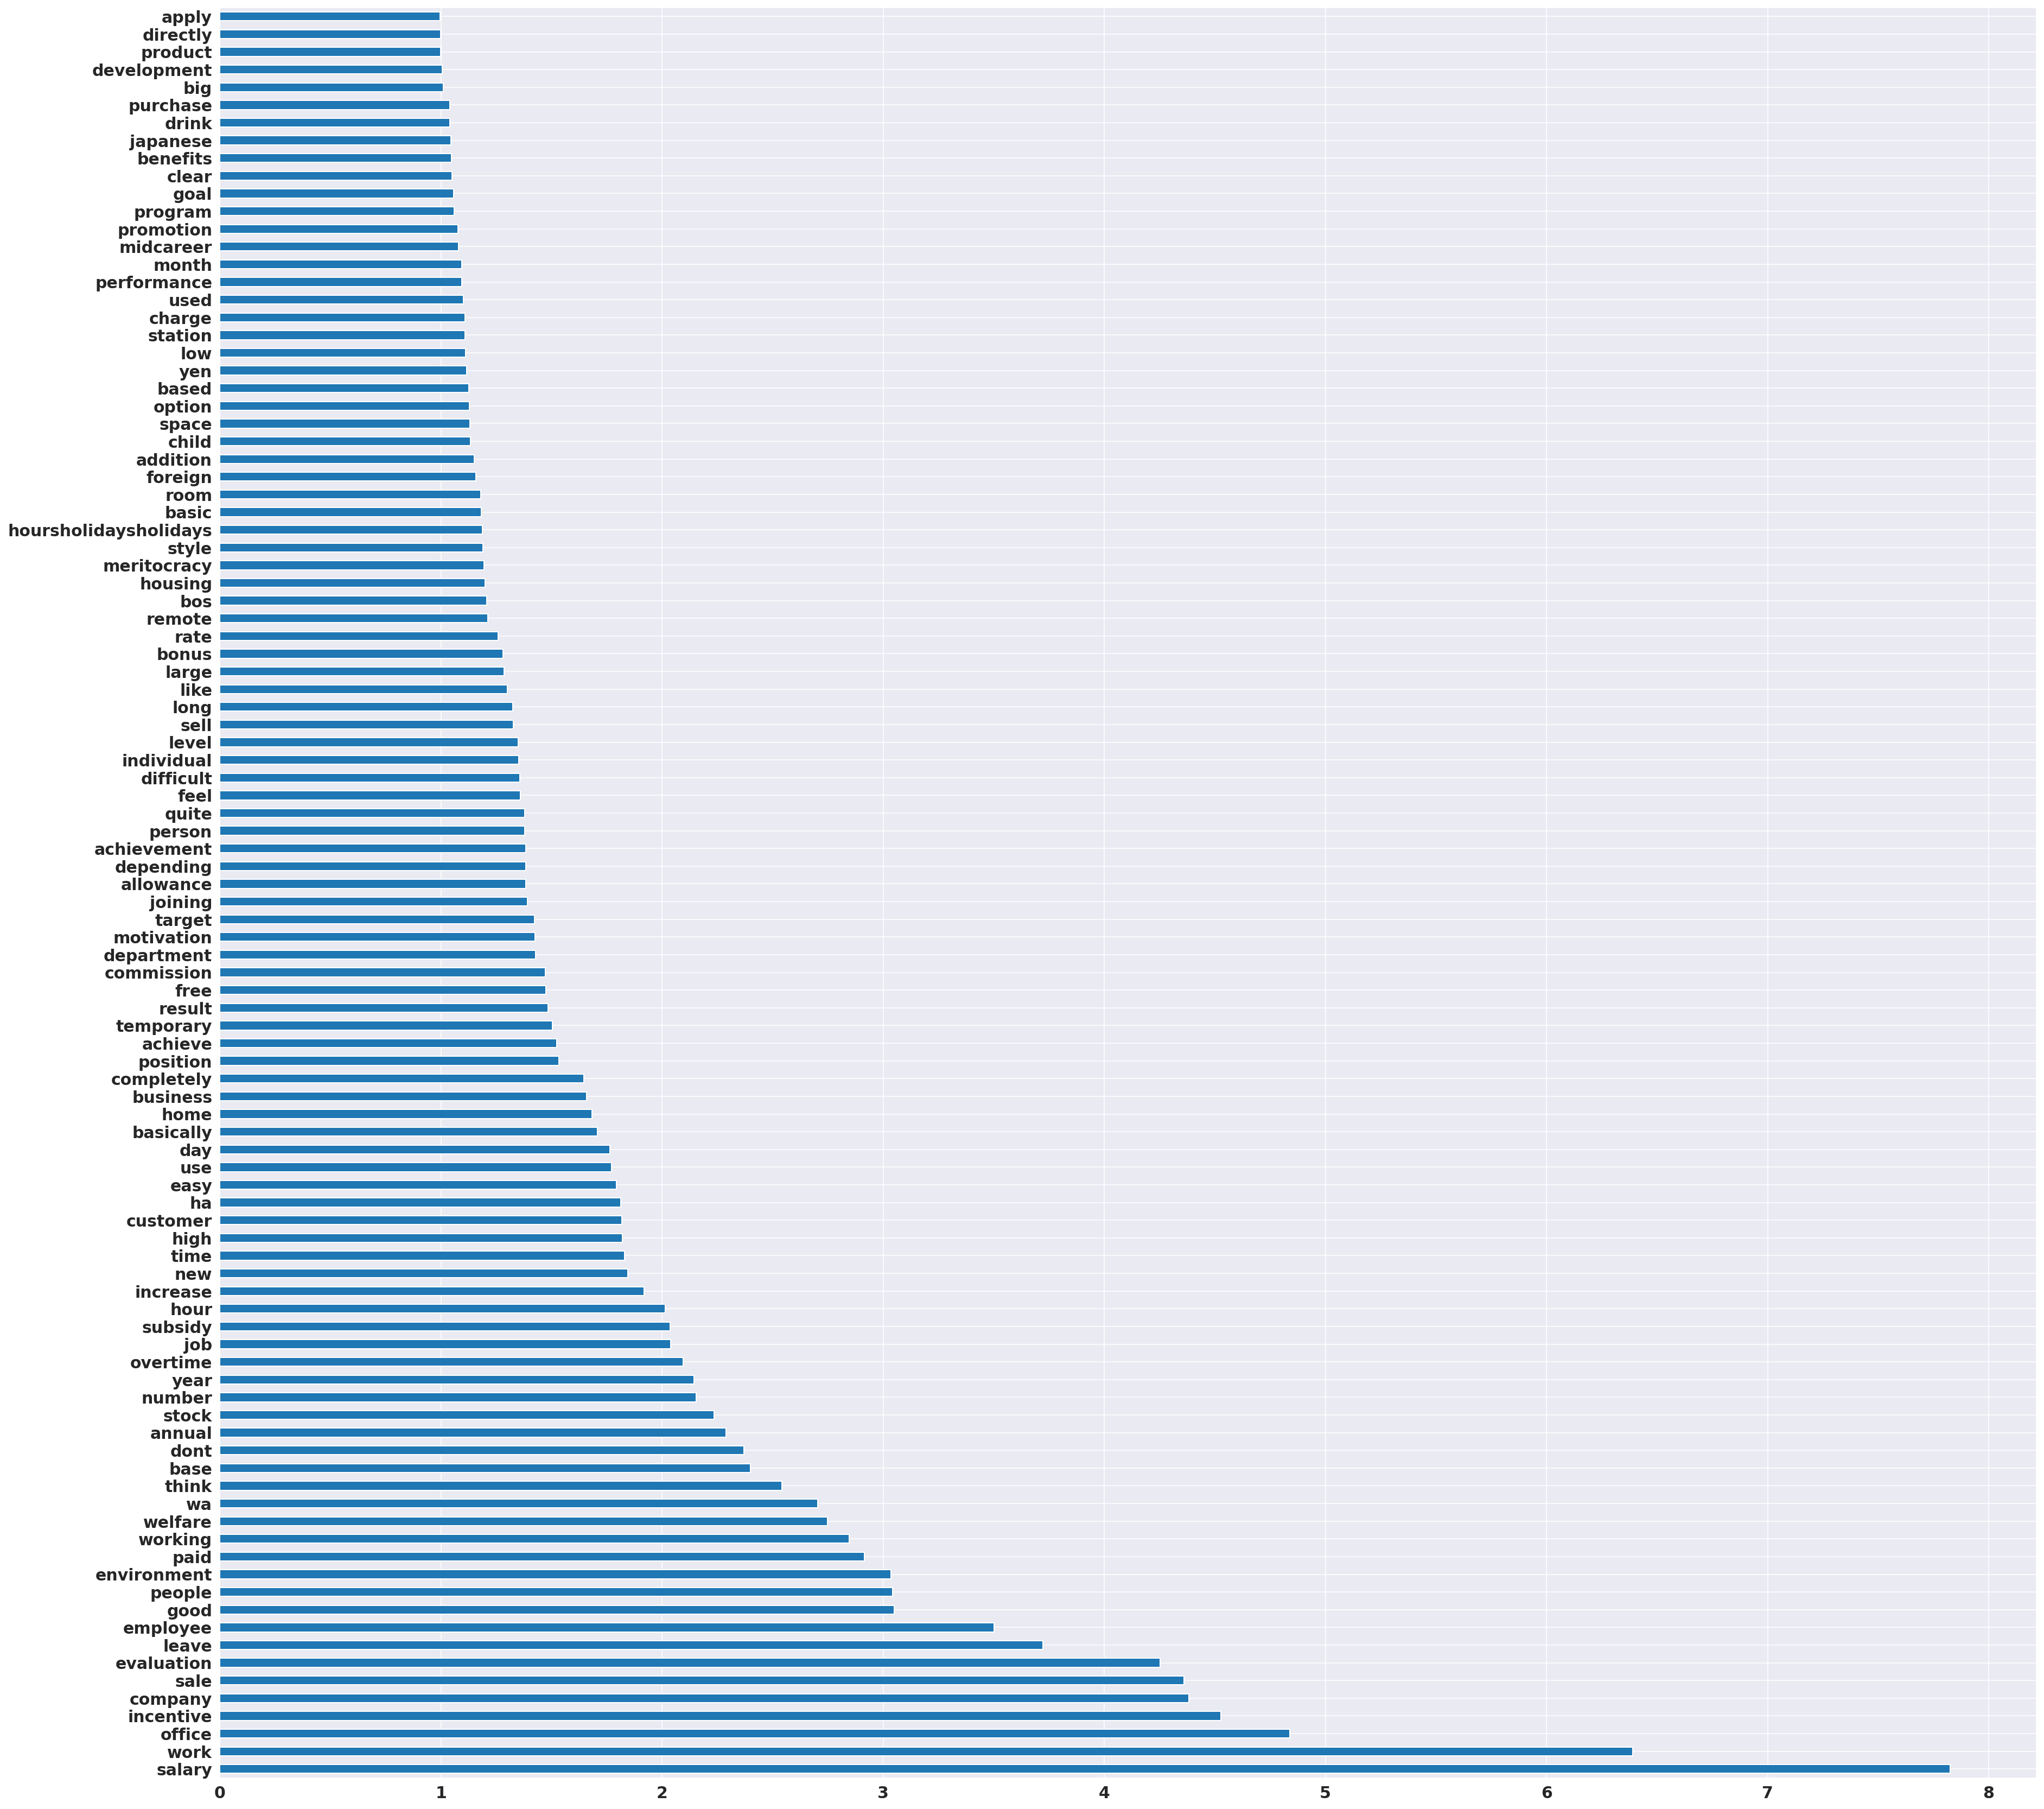

In [21]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(senti_neg['review_translated'])

pro_tf = tf.transform(senti_neg['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


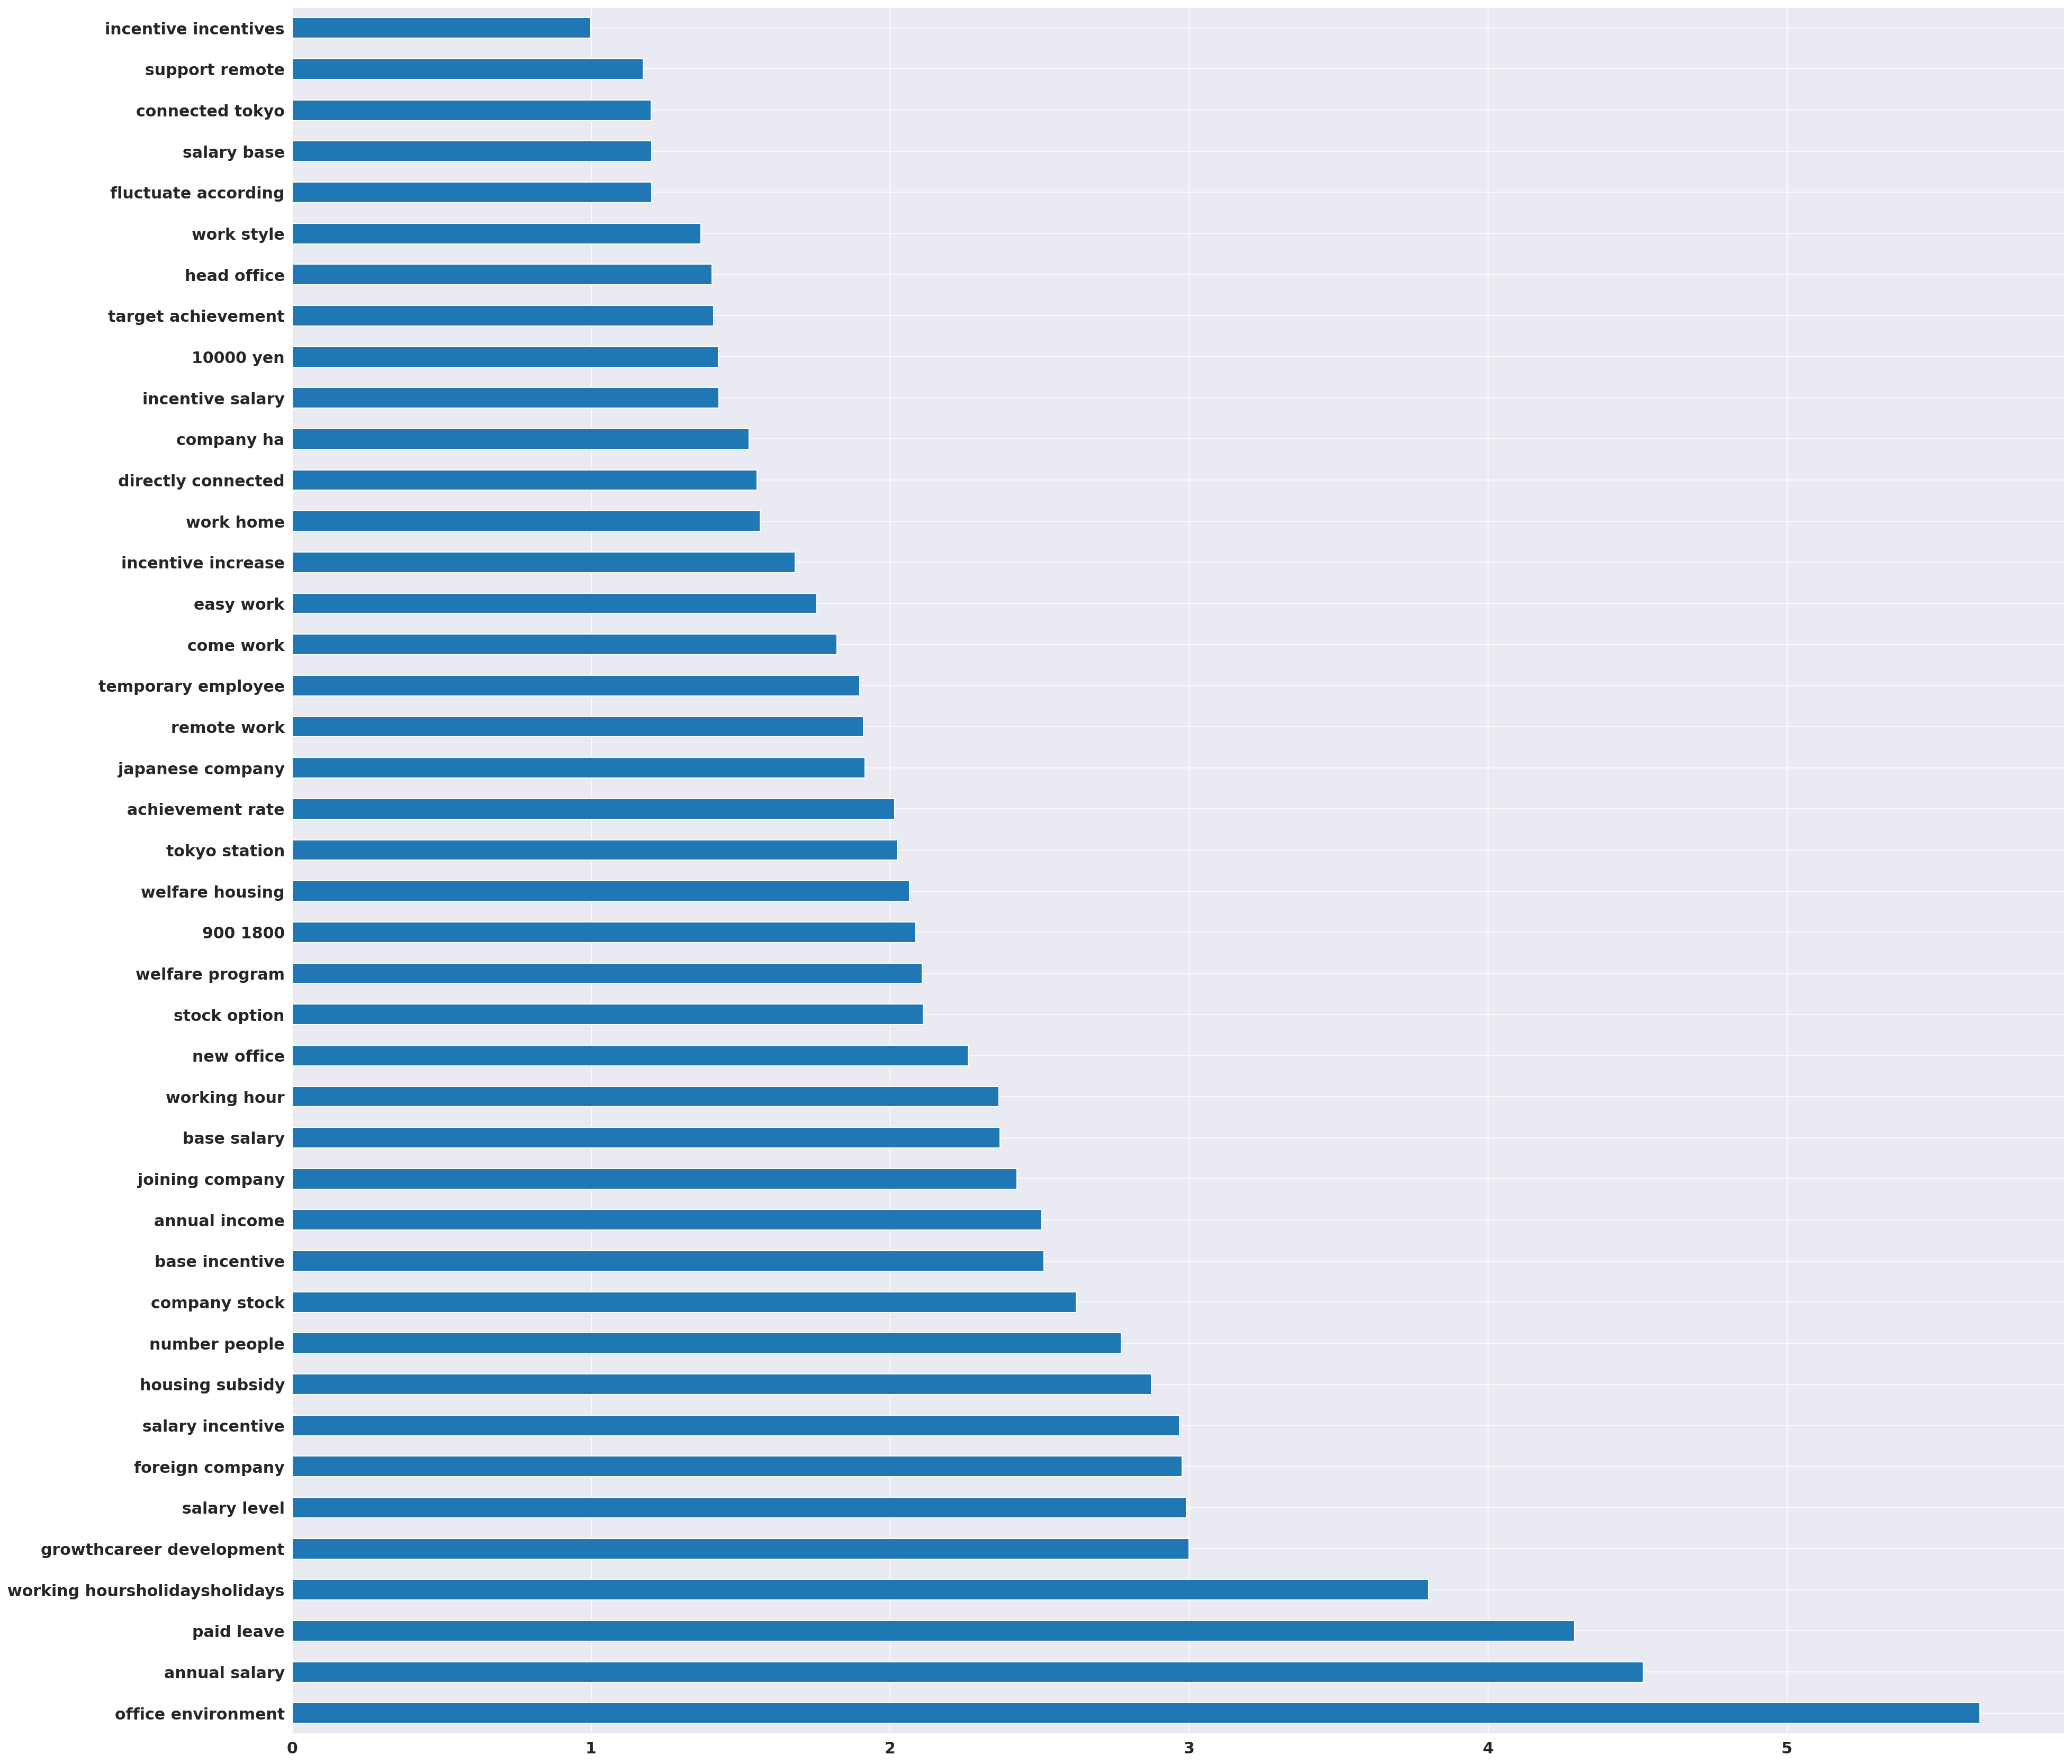

In [22]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(senti_neg['review_translated'])

pro_tf = tf.transform(senti_neg['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


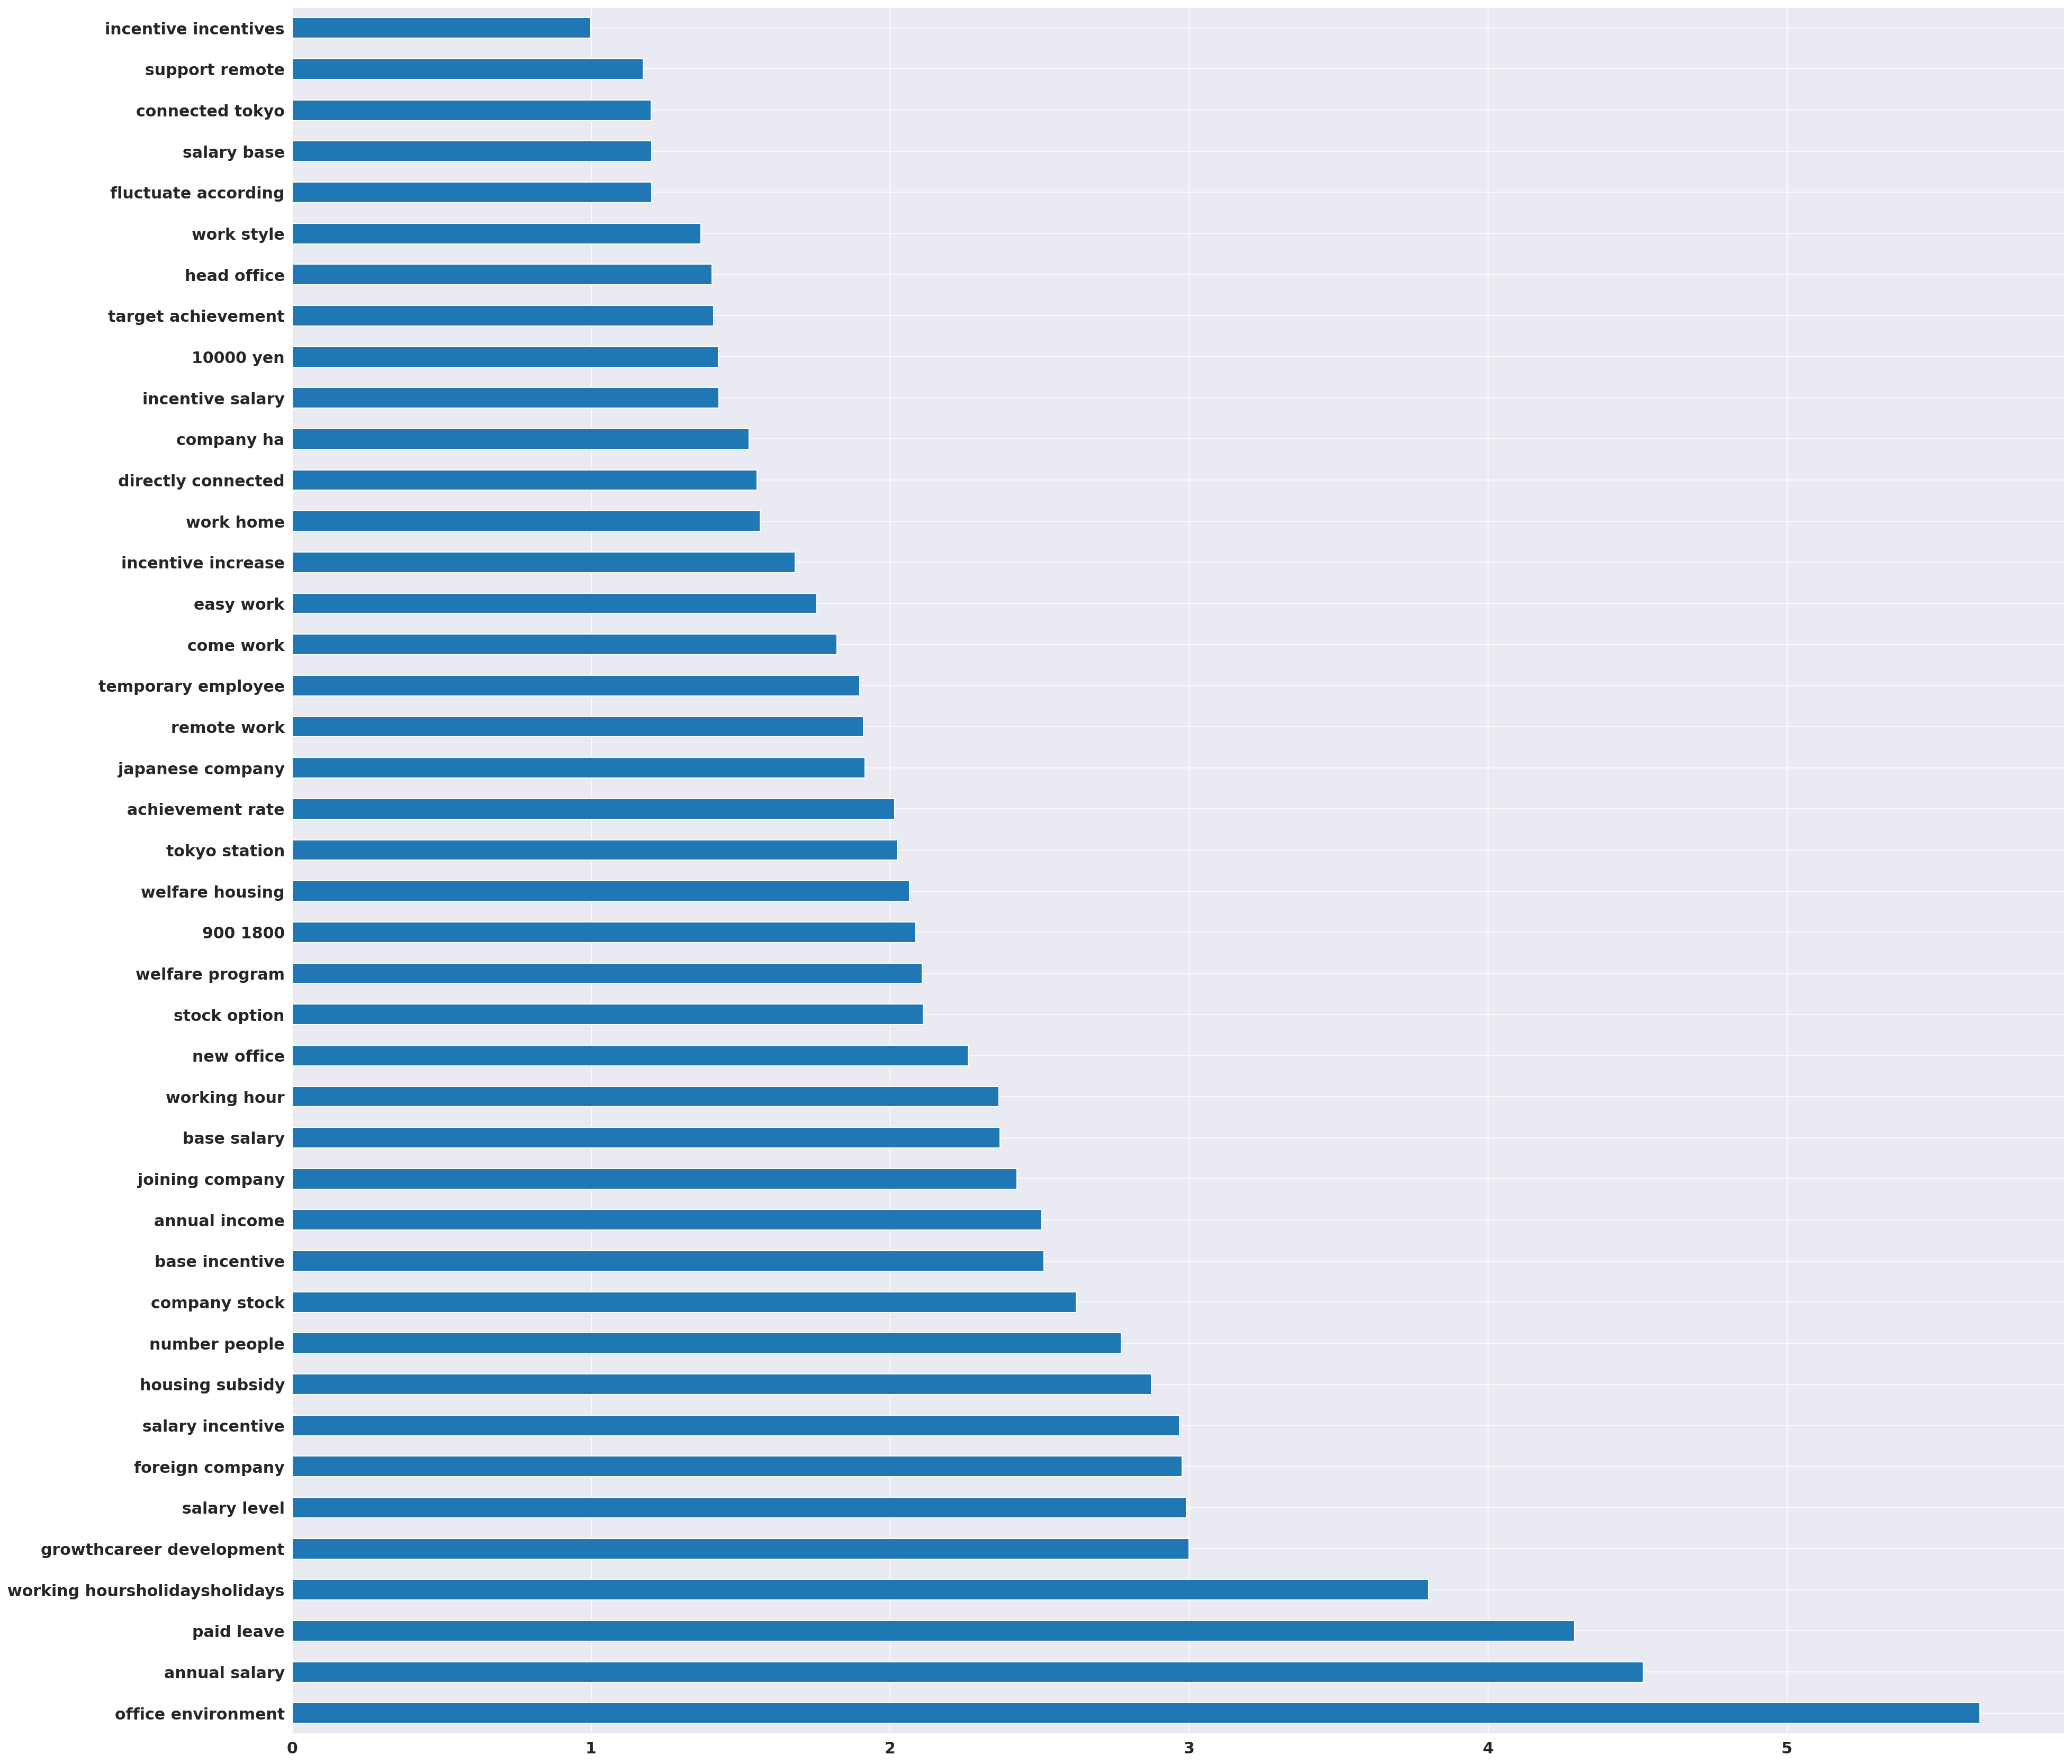

In [23]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
tf.fit(senti_neg['review_translated'])

pro_tf = tf.transform(senti_neg['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)